# Scraping the data from the website

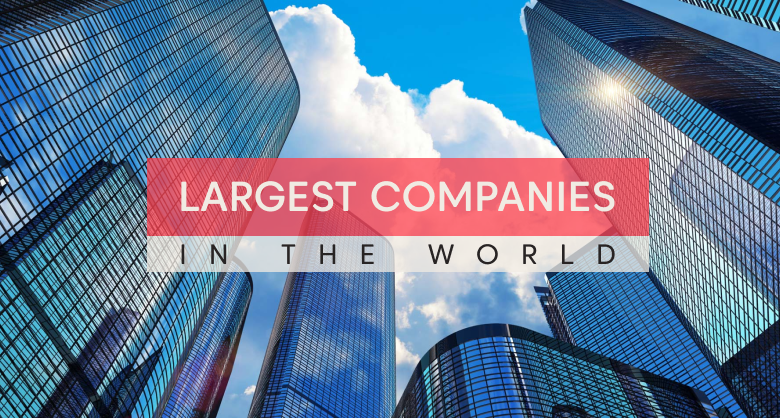

In [ ]:
from bs4 import BeautifulSoup
import requests

In [ ]:
url ='https://en.wikipedia.org/wiki/List_of_largest_companies_in_the_United_States_by_revenue'

In [ ]:
response = requests.get(url)
response.status_code
soup = BeautifulSoup(response.content, 'html')

In [ ]:
print(soup)

<!DOCTYPE html>
<html class="client-nojs vector-feature-language-in-header-enabled vector-feature-language-in-main-page-header-disabled vector-feature-sticky-header-disabled vector-feature-page-tools-pinned-disabled vector-feature-toc-pinned-clientpref-1 vector-feature-main-menu-pinned-disabled vector-feature-limited-width-clientpref-1 vector-feature-limited-width-content-enabled vector-feature-custom-font-size-clientpref-1 vector-feature-appearance-enabled vector-feature-appearance-pinned-clientpref-1 vector-feature-night-mode-disabled skin-theme-clientpref-day vector-toc-available" dir="ltr" lang="en">
<head>
<meta charset="utf-8"/>
<title>List of largest companies in the United States by revenue - Wikipedia</title>
<script>(function(){var className="client-js vector-feature-language-in-header-enabled vector-feature-language-in-main-page-header-disabled vector-feature-sticky-header-disabled vector-feature-page-tools-pinned-disabled vector-feature-toc-pinned-clientpref-1 vector-featur

In [ ]:
table = soup.find_all('table')[1]
print(table)

<table class="wikitable sortable">
<caption>
</caption>
<tbody><tr>
<th>Rank
</th>
<th>Name
</th>
<th>Industry
</th>
<th>Revenue <br/>(USD millions)
</th>
<th>Revenue growth
</th>
<th>Employees
</th>
<th>Headquarters
</th></tr>
<tr>
<td>1
</td>
<td><a href="/wiki/Walmart" title="Walmart">Walmart</a>
</td>
<td><a href="/wiki/Retail" title="Retail">Retail</a>
</td>
<td style="text-align:center;">611,289
</td>
<td style="text-align:center;"><span typeof="mw:File"><span title="Increase"><img alt="Increase" class="mw-file-element" data-file-height="300" data-file-width="300" decoding="async" height="11" src="//upload.wikimedia.org/wikipedia/commons/thumb/b/b0/Increase2.svg/11px-Increase2.svg.png" srcset="//upload.wikimedia.org/wikipedia/commons/thumb/b/b0/Increase2.svg/17px-Increase2.svg.png 1.5x, //upload.wikimedia.org/wikipedia/commons/thumb/b/b0/Increase2.svg/22px-Increase2.svg.png 2x" width="11"/></span></span> <span data-sort-value="7000300000000000000♠" style="display:none"></span> 6.

In [ ]:
world_title = table.find_all('th')
print(world_title)

[<th>Rank
</th>, <th>Name
</th>, <th>Industry
</th>, <th>Revenue <br/>(USD millions)
</th>, <th>Revenue growth
</th>, <th>Employees
</th>, <th>Headquarters
</th>]


In [ ]:
world_table_title = [title.text.strip() for title in world_title]
print(world_table_title)

['Rank', 'Name', 'Industry', 'Revenue (USD millions)', 'Revenue growth', 'Employees', 'Headquarters']


In [ ]:
import pandas as pd
df = pd.DataFrame(columns=world_table_title)
print(df)

Empty DataFrame
Columns: [Rank, Name, Industry, Revenue (USD millions), Revenue growth, Employees, Headquarters]
Index: []


In [ ]:
column_data = table.find_all('tr')

In [ ]:
for row in column_data[1:]:
  row_data = row.find_all('td')
  individual_row_data = [data.text.strip() for data in row_data]

  length = len(df)
  df.loc[length] = individual_row_data


In [ ]:
df

,Rank,Name,Industry,Revenue (USD millions),Revenue growth,Employees,Headquarters
0,1,Walmart,Retail,"611,289",6.7%,"2,100,000","Bentonville, Arkansas"
1,2,Amazon,Retail and cloud computing,"513,983",9.4%,"1,540,000","Seattle, Washington"
2,3,ExxonMobil,Petroleum industry,"413,680",44.8%,"62,000","Spring, Texas"
3,4,Apple,Electronics industry,"394,328",7.8%,"164,000","Cupertino, California"
4,5,UnitedHealth Group,Healthcare,"324,162",12.7%,"400,000","Minnetonka, Minnesota"
...,...,...,...,...,...,...,...
95,96,Best Buy,Retail,"46,298",10.6%,"71,100","Richfield, Minnesota"
96,97,Bristol-Myers Squibb,Pharmaceutical industry,"46,159",0.5%,"34,300","New York City, New York"
97,98,United Airlines,Airline,"44,955",82.5%,"92,795","Chicago, Illinois"
98,99,Thermo Fisher Scientific,Laboratory instruments,"44,915",14.5%,"130,000","Waltham, Massachusetts"


In [ ]:
df.to_csv('/content/drive/MyDrive/My_Projects/Web Scrapping Project/companies.csv',index= False)

# Exploratory Data Analysis

Data Refinement

In [ ]:
df.describe()

,Rank,Name,Industry,Revenue (USD millions),Revenue growth,Employees,Headquarters
count,100,100,100,100,100,100,100
unique,100,100,39,99,92,97,76
top,1,Walmart,Financials,"47,194",9.4%,"50,000","New York City, New York"
freq,1,1,11,2,2,2,12


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 100 entries, 0 to 99
Data columns (total 7 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Rank                    100 non-null    object
 1   Name                    100 non-null    object
 2   Industry                100 non-null    object
 3   Revenue (USD millions)  100 non-null    object
 4   Revenue growth          100 non-null    object
 5   Employees               100 non-null    object
 6   Headquarters            100 non-null    object
dtypes: object(7)
memory usage: 6.2+ KB


In [ ]:
df.isnull().sum()

Rank                      0
Name                      0
Industry                  0
Revenue (USD millions)    0
Revenue growth            0
Employees                 0
Headquarters              0
dtype: int64

Removing commas to change data type to float

In [ ]:
df['Revenue (USD millions)'] = df['Revenue (USD millions)'].str.replace(',','',regex=True)
df['Revenue (USD millions)'] = df['Revenue (USD millions)'].astype(float)

Removing value 4000[2] in the Employees row to clean data

In [ ]:
df['Employees'].isin(['4000[2]']).any()

False

In [ ]:
df['Employees'] = df['Employees'].str.replace(',','',regex=True)
df=df.drop(df[df['Employees'] == '4000[2]'].index)
df['Employees'] = df['Employees'].astype(int)

In [ ]:
df.rename(columns={'Revenue growth':'Revenue growth %'}, inplace=True)

In [ ]:
df['Revenue growth %'] = df['Revenue growth %'].str.replace('%','',regex=True)
df['Revenue growth %'] = df['Revenue growth %'].astype(float)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 99 entries, 0 to 99
Data columns (total 7 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Rank                    99 non-null     object 
 1   Name                    99 non-null     object 
 2   Industry                99 non-null     object 
 3   Revenue (USD millions)  99 non-null     float64
 4   Revenue growth %        99 non-null     float64
 5   Employees               99 non-null     int64  
 6   Headquarters            99 non-null     object 
dtypes: float64(2), int64(1), object(4)
memory usage: 6.2+ KB


In [ ]:
df.head()

,Rank,Name,Industry,Revenue (USD millions),Revenue growth %,Employees,Headquarters
0,1,Walmart,Retail,611289.0,6.7,2100000,"Bentonville, Arkansas"
1,2,Amazon,Retail and cloud computing,513983.0,9.4,1540000,"Seattle, Washington"
2,3,ExxonMobil,Petroleum industry,413680.0,44.8,62000,"Spring, Texas"
3,4,Apple,Electronics industry,394328.0,7.8,164000,"Cupertino, California"
4,5,UnitedHealth Group,Healthcare,324162.0,12.7,400000,"Minnetonka, Minnesota"


In [ ]:
import re
pat = re.compile(r'[,]')
df[['City','State']] = df['Headquarters'].str.split(pat,expand = True, n=1)

In [ ]:
df.head()

,Rank,Name,Industry,Revenue (USD millions),Revenue growth %,Employees,Headquarters,City,State
0,1,Walmart,Retail,611289.0,6.7,2100000,"Bentonville, Arkansas",Bentonville,Arkansas
1,2,Amazon,Retail and cloud computing,513983.0,9.4,1540000,"Seattle, Washington",Seattle,Washington
2,3,ExxonMobil,Petroleum industry,413680.0,44.8,62000,"Spring, Texas",Spring,Texas
3,4,Apple,Electronics industry,394328.0,7.8,164000,"Cupertino, California",Cupertino,California
4,5,UnitedHealth Group,Healthcare,324162.0,12.7,400000,"Minnetonka, Minnesota",Minnetonka,Minnesota


In [35]:
df.value_counts('Industry')

Industry
Financials                            10
Retail                                10
Petroleum industry                    10
Pharmaceutical industry                6
Healthcare                             6
Technology                             5
Insurance                              5
Telecommunications                     3
Airline                                3
Technology and cloud computing         3
Conglomerate                           3
Aerospace and defense                  2
Health insurance                       2
Food processing                        2
Food industry                          2
Transportation                         2
Automotive industry                    2
Financial                              2
Financial services                     1
Chemical industry                      1
Agriculture manufacturing              1
Telecom hardware manufacturing         1
Apparel                                1
Automotive and energy                  1
Retail 

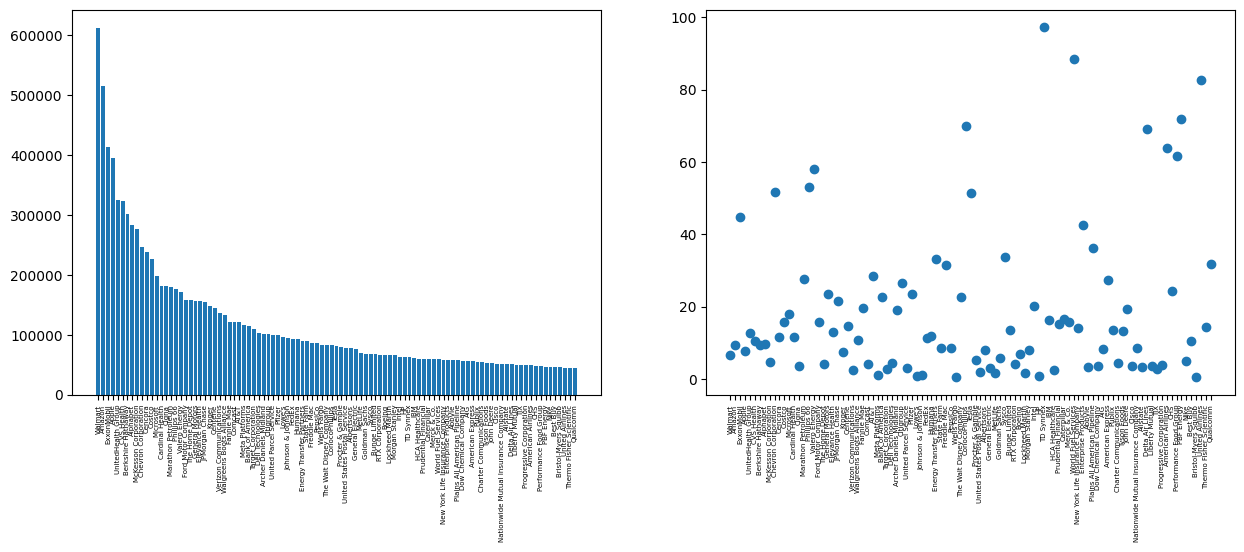

In [ ]:
import matplotlib.pyplot as plt
fig, axs = plt.subplots(1,2)
fig.set_size_inches(15,5)
axs[0].bar(df['Name'],df['Revenue (USD millions)'],align='center')
axs[1].scatter(df['Name'],df['Revenue growth %'])
axs[0].tick_params(axis='x', rotation=90, labelsize=5)
axs[1].tick_params(axis='x', rotation=90, labelsize=5)
plt.show()



In [42]:
df.loc[df['Revenue (USD millions)'].idxmax()]

Rank                                          1
Name                                    Walmart
Industry                                 Retail
Revenue (USD millions)                 611289.0
Revenue growth %                            6.7
Employees                               2100000
Headquarters              Bentonville, Arkansas
City                                Bentonville
State                                  Arkansas
Name: 0, dtype: object

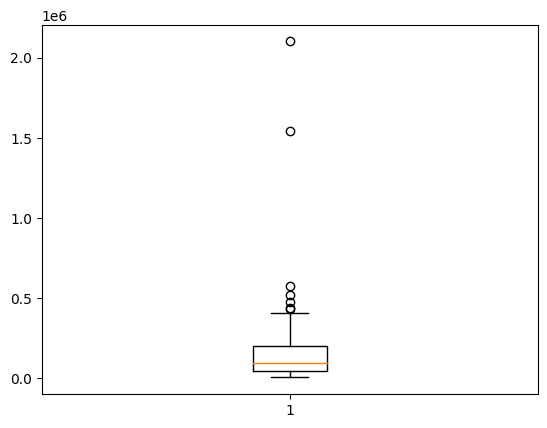

In [45]:
plt.boxplot(df['Employees'])
plt.show()

The Z-score method identifies outliers by standardizing the data and calculating how many standard deviations a data point is from the mean.
Let's
Calculate the mean and standard deviation.
Calculate the Z-score: Z = (X - mean) / std
Define the outlier threshold: Typically, a Z-score > 3 or < -3 indicates an outlier.

In [47]:
def find_outliers():
  mean = df['Employees'].mean()
  std = df['Employees'].std()
  outliers = []
  for data in df['Employees']:
    z_score =(data - mean)/std
    if z_score >3 or z_score < -3:
      outliers.append(data)
      return outliers

find_outliers()

[2100000]

# Checking the co-relation between Number of Employees and the revenue

<Axes: xlabel='Employees', ylabel='Revenue (USD millions)'>

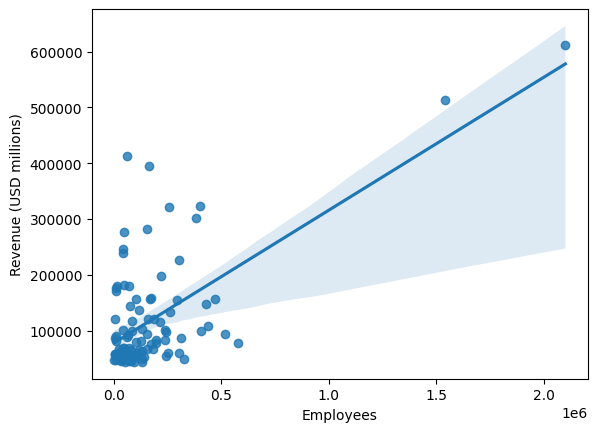

In [43]:
import seaborn as sns
sns.regplot(x='Employees',y='Revenue (USD millions)',data=df)

In [56]:
#Checking pearson Co-efficient and p-Value
from scipy.stats import pearsonr
pearson_coef ,p_value = pearsonr(df['Employees'],df['Revenue (USD millions)'])

print(f"Pearson Coefficient is:",pearson_coef)
print(f"Pearson Value is:",p_value)

Pearson Coefficient is: 0.640893150462695
Pearson Value is: 9.001360406917155e-13


There is no co relation between Employees and the revenue in these companies.

In [57]:
df['Revenue growth %'].corr(df['Employees'])

-0.2233950926242041

In [32]:
df.to_csv('/content/drive/MyDrive/My_Projects/Web Scrapping Project/companies_cleaned.csv')